# IMPORTS

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

### Load Data

In [64]:
df = pd.read_csv("../info_init/bankable_consumer_train.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,bankable
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
2,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
3,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
4,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19531,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
19532,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
19533,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
19534,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


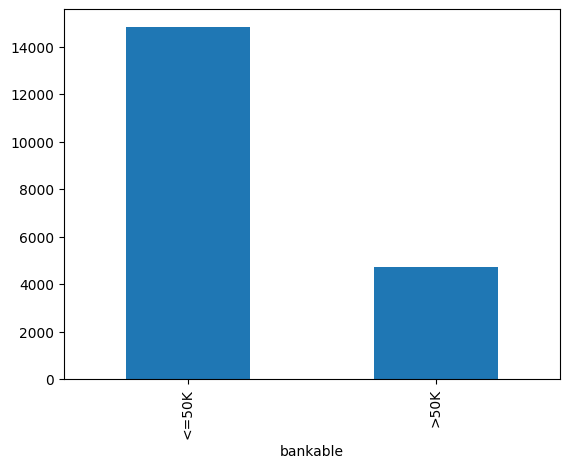

In [65]:
bankable_counts = df['bankable'].value_counts()
bankable_counts.plot(kind='bar')
plt.show()

In [66]:
# bankable_counts = df['age'].value_counts()
# bankable_counts.plot(kind='bar')
# plt.show()

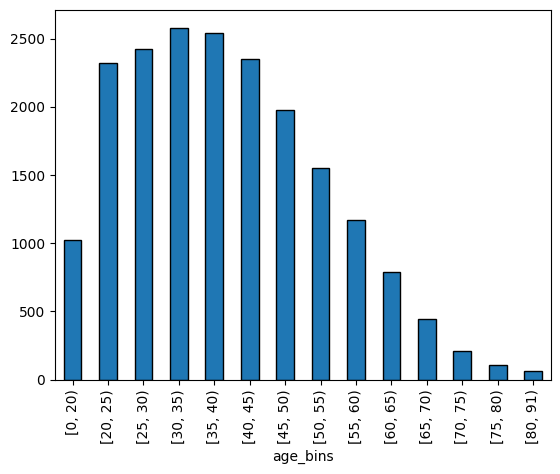

In [67]:
# Définir les bins
bins = [0, 20] + list(range(25, 81, 5)) + [df['age'].max() + 1]

# Création d'un histogramme avec des bins personnalisés pour l'âge
df_age = df.copy()
df_age['age_bins'] = pd.cut(df['age'], bins=bins, include_lowest=True, right=False, duplicates='drop')
age_counts = df_age['age_bins'].value_counts().sort_index()

# Affichage de l'histogramme
age_counts.plot(kind='bar', edgecolor='black')
plt.show()

In [68]:
# bankable_counts = df['native.country'].value_counts()
# bankable_counts.plot(kind='bar')
# plt.show()

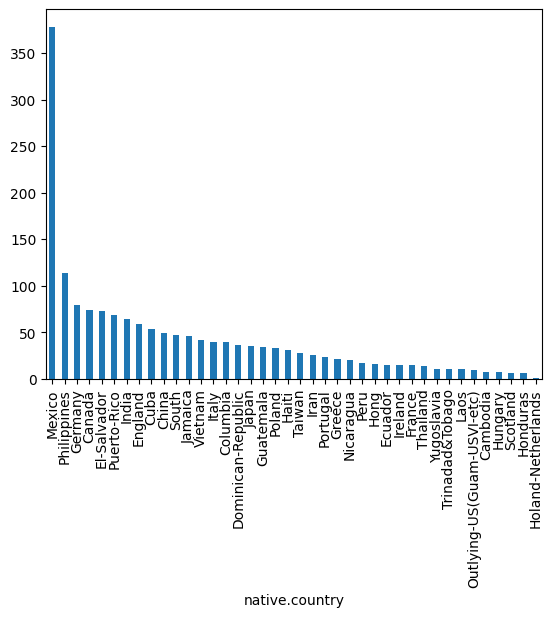

In [69]:
# Filtrer le DataFrame pour exclure les États-Unis
df_filtered = df[df['native.country'] != 'United-States']
df_filtered = df_filtered[df_filtered['native.country'] != '?']

# Créer le graphique
bankable_counts = df_filtered['native.country'].value_counts()
bankable_counts.plot(kind='bar')
plt.show()

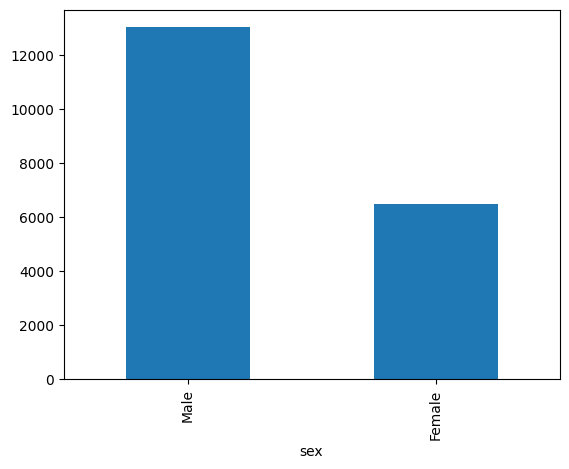

In [70]:
bankable_counts = df['sex'].value_counts()
bankable_counts.plot(kind='bar')
plt.show()

In [71]:
# bankable_counts = df['hours.per.week'].value_counts()
# bankable_counts.plot(kind='bar')
# plt.show()

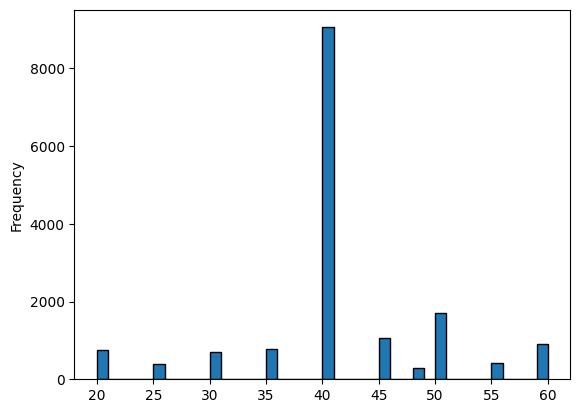

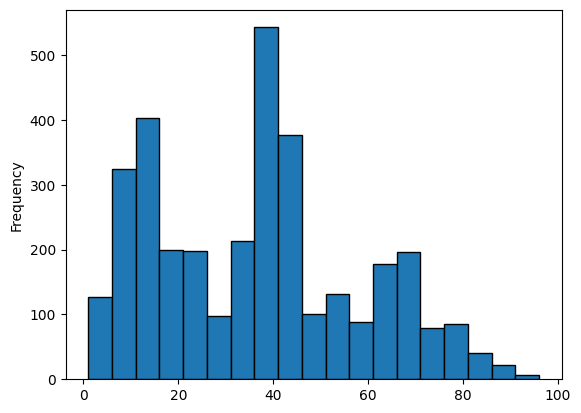

In [72]:
# Création d'un histogramme avec des bins d'une heure pour les heures les plus courantes
common_hours = df['hours.per.week'].value_counts().index[:10]  # Prendre les 10 heures les plus courantes
df_common_hours = df[df['hours.per.week'].isin(common_hours)]
df_common_hours['hours.per.week'].plot(kind='hist', bins=range(min(common_hours), max(common_hours) + 1), edgecolor='black')
plt.show()

# Création d'un histogramme avec des bins de 5 heures pour le reste
remaining_hours = df[~df['hours.per.week'].isin(common_hours)]
remaining_hours['hours.per.week'].plot(kind='hist', bins=range(min(remaining_hours['hours.per.week']), max(remaining_hours['hours.per.week']) + 1, 5), edgecolor='black')
plt.show()

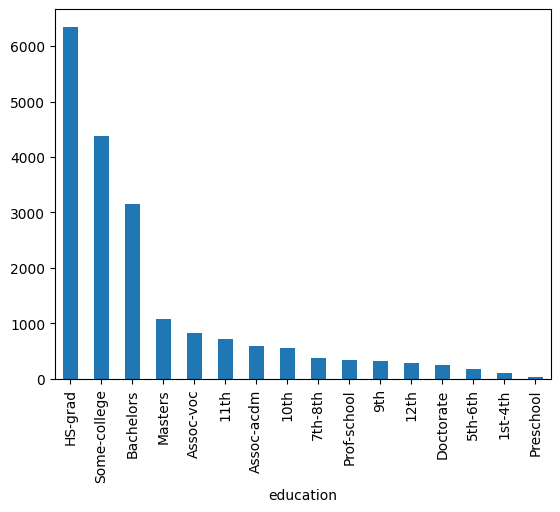

In [73]:
bankable_counts = df['education'].value_counts()
bankable_counts.plot(kind='bar')
plt.show()